# Lista 4
2018/3 

Aluno: Pedro Bandeira de Mello Martins 

Disciplina: CPE773 - Otimização Convexa 

Professor: Wallace A. Martins PEE/COPPE - UFRJ

In [1]:
import sys
if '../..' not in sys.path:
    sys.path.append('../..')
import warnings
warnings.filterwarnings('ignore')
from functions import exercise1116,\
                        question42,\
                        question43,\
                        question44,\
                        question45,\
                        functionObj
from models.optimizers import SteepestDescentAlgorithm,\
                              FletcherReevesAlgorithm,\
                              BacktrackingLineSearch,\
                              FibonacciSearch,\
                              ConjugateGradientAlgorithm,\
                              QuasiNewtonAlgorithm, \
                              BasicNewtonAlgorithm 
from models.utils import UnconstrainProblem
from autograd import numpy as np
from run_exercise import run_exercise

## Questão 1

Para o problema:

minimize 

$f(x) = x_1 + 1.5x_2 + x_3 + x_4$

subject to: 

$x_1 + 2x_2 + x_3 +2x_4 = 3$

$x_1 + x_2 + 2x_3 + 4x_4 = 5$
            
$x_i \geq 0$

In [2]:
f_x, eqc, iqc = exercise1116()
initial_x = np.array([0, 0], dtype=np.float64)

In [3]:
solution = run_exercise(f_x, eqc, iqc,
             [(SteepestDescentAlgorithm, BacktrackingLineSearch), 
              ConjugateGradientAlgorithm, 
              QuasiNewtonAlgorithm, 
              (BasicNewtonAlgorithm, BacktrackingLineSearch)],
                        initial_x,
                       plot_charts=False)

QuasiNewtonAlgorithm didn't converge. AssertionError('X out of domain',)
minimize didn't converge. AttributeError('nhev',)


In [4]:
solution[['best_f', 'best_x', 'fevals', 'grad_evals', 'nevals', 'run_time (s)']]

,best_f,best_x,fevals,grad_evals,nevals,run_time (s)
SteepestDescentAlgorithm + BacktrackingLineSearch,1.6666708720504597,"[1e-07, 0.3333333, 2e-07, 1.1666666]",12511,1372,13883,8.423343
ConjugateGradientAlgorithm,1.970588699457983,"[0.2352941, 0.254902, 0.4509804, 0.9019608]",4000,4004,8004,22.384894
QuasiNewtonAlgorithm,1.9743015462053486,"[0.2352941, 0.254902, 0.4509804, 0.9019608]",5,10,15,0.020881
BasicNewtonAlgorithm + BacktrackingLineSearch,1.6666708175852056,"[5e-07, 0.3333332, 4e-07, 1.1666664]",7075,2037,9112,14.320457
minimize,1.6667928434652193,"[0.000252, 0.3332493, 7.26e-05, 1.1665884]",390,0,390,0.164817


Nessa questão, o algoritmo QuasiNewton não convergiu, assim como o algoritmo Gradiente Conjugado.
Na tabela, a linha indicada por "minimize" mostra o resultado encontrado pela implementação do scipy do SLQSP. Dentre as implementações feitas para o trabalho, o algoritmo de Newton apresentou os melhores resultados.

O código de adição de restrições na função pode ser encontrado no método "add_constraints" no arquivo [../../functions/functionObj.py](../../functions/functionObj.py).

## Questão 2

Find the shortest distance between the two ellipsis.
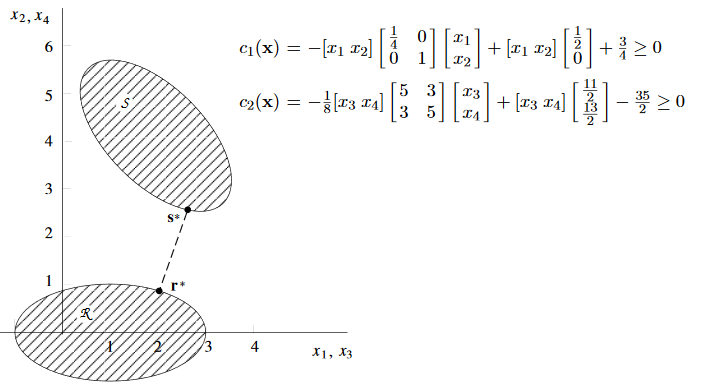

In [5]:
f_x, ineq = question42()
initial_x = np.array([0, 0,2,4], dtype=np.float64)

### Implementação SciPy

In [6]:
from scipy.optimize import minimize
f_obj_scipy = functionObj(f_x, iqc=ineq)

x0 = initial_x
while f_obj_scipy.niq/f_obj_scipy.smooth_log_constant > 1e-6:
    res = minimize(fun=f_obj_scipy, x0=x0)
    if f_obj_scipy._has_eqc:
        x0 = f_obj_scipy.best_z
    else:
        x0 = f_obj_scipy.best_x
    f_obj_scipy.smooth_log_constant *= 20
print('fun: ', f_obj_scipy._func_with_no_constraints(np.array(f_obj_scipy.best_x)))
print('x: ', f_obj_scipy.best_x)
print('nfev: ', f_obj_scipy.nevals)

fun:  2.916830858245042
x:  [2.04479963 0.85266241 2.54497528 2.48565205]
nfev:  1239


### Implementação para o trabalho

In [7]:
f_obj = functionObj(f_x, iqc=ineq)
UnconstrainProblem(f_obj, initial_x, BasicNewtonAlgorithm, 
                   line_search_optimizer=BacktrackingLineSearch).find_min()
print('fun: ', f_obj._func_with_no_constraints(np.array(f_obj.best_x)))
print('x: ', f_obj.best_x)
print('nfev: ', f_obj.nevals)

fun:  2.9165809179855966
x:  [2.04474964 0.85271598 2.54491305 2.48563285]
nfev:  6745


O $\mathbf{x}=[0,0,2,4]$ foi escolhido por observação do gráfico e confirmação com as restrições de desigualdade.

A implementação do SciPy encontrou $\mathbf{x}^{(1)} =[x_1, x_2]$ e $\mathbf{x}^{(2)} = [x_3, x_4]$ muito próximos ($d(\mathbf{x}^{(1)} , \mathbf{x}^{(2)} = 2.916830$). O $f(x)$ passado para o algoritmo foi o $f(x)$ modificado com as barreiras logarítmicas implementadas na classe functionObj. O resultado encontrado pelo SciPy é muito próximo do mostrado na figura, é possível que a implementação de barreira logarítmica e a modelagem do problema estejam corretas.

A implementação feita para a lista 4 encontrou os mesmos valores do algoritmo referência, porém utilizou uma quantidade maior de avaliações. O algoritmo de minimização para funções com restrição de barreira logarítmica pode ser visualizado em [../../models/utils/unconstrain.py](../../models/utils/unconstrain.py). Para agilizar o algoritmo, foi adicionado uma tolerância variável de acordo com o t da barreira logarítmica. Assim quanto mais o $x$ se aproxima do mínimo, maior precisão é necessária.

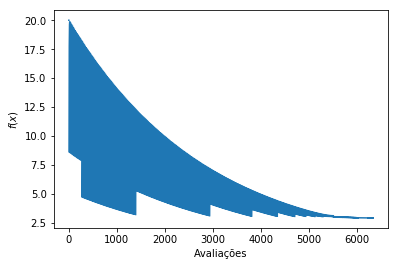

In [8]:
import matplotlib.pyplot as plt
plt.plot(f_obj.all_evals)
plt.xlabel('Avaliações')
plt.ylabel('$f(x)$')
plt.show()

## Questão 3
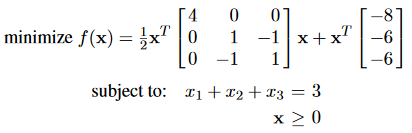

In [9]:
f_x, eqc, iqc = question43()
initial_x = np.array([0, 0], dtype=np.float64)

In [10]:
solution = run_exercise(f_x, eqc, iqc,
             [(SteepestDescentAlgorithm, BacktrackingLineSearch), 
              ConjugateGradientAlgorithm, 
              QuasiNewtonAlgorithm, 
              (BasicNewtonAlgorithm, BacktrackingLineSearch)],
                        initial_x,
                        maxIter = 500,
                       plot_charts=False)

minimize didn't converge. AttributeError('nhev',)


In [11]:
solution[['best_f', 'best_x', 'fevals', 'grad_evals', 'nevals', 'run_time (s)']]

,best_f,best_x,fevals,grad_evals,nevals,run_time (s)
SteepestDescentAlgorithm + BacktrackingLineSearch,-18.498986717575505,"[0.5225084, 1.2387458, 1.2387458]",5852,2000,7852,8.352563
ConjugateGradientAlgorithm,-18.499999969135487,"[0.5000019, 1.249999, 1.249999]",9,9,18,0.096442
QuasiNewtonAlgorithm,-18.499999969142497,"[0.5, 1.25, 1.25]",12,4009,4021,11.486594
BasicNewtonAlgorithm + BacktrackingLineSearch,-18.499999969142497,"[0.5, 1.25, 1.25]",411,40,451,0.593153
minimize,-18.499998457131547,"[0.5000019, 1.249999, 1.2499991]",76,0,76,0.029257


Essa foi a única questão em que todos os algoritmos encontraram valores de $f(x)$ muito próximos, com um erro máximo de $\epsilon=1e-3$ para o SteepestDescentAlgorithm com BacktrackingLineSearch.

## Questão 4
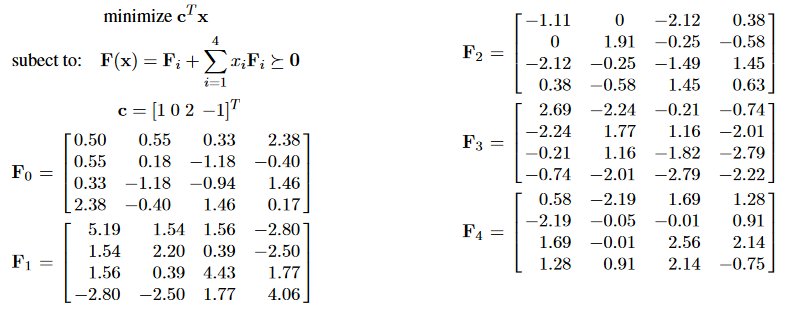

In [12]:
from scipy.optimize import minimize

f_x, iqc = question44()
find_feasible_f = functionObj(lambda x: 1, iqc=iqc)
x0 = -np.array([1, 0, 2, -1], dtype=np.float64)
initial_x = UnconstrainProblem(find_feasible_f, x0, SteepestDescentAlgorithm, 
                   line_search_optimizer=BacktrackingLineSearch).find_min()
print(initial_x, find_feasible_f.func(initial_x))

[-1. -0. -2.  1.] inf


Não foi encontrado um x inicial viável. É capaz que o modelo do problema da questão 4 tenha sido implementado errado. A implementação desse problema pode ser encontrada em [../../functions/functions.py](../../functions/functions.py).

In [13]:
solution = run_exercise(f_x, None, iqc,
             [(SteepestDescentAlgorithm, BacktrackingLineSearch), 
              ConjugateGradientAlgorithm, 
              QuasiNewtonAlgorithm, 
              (BasicNewtonAlgorithm, BacktrackingLineSearch)],
                        np.array(initial_x, dtype=np.float64),
                        maxIter = 500,
                       plot_charts=False)

QuasiNewtonAlgorithm didn't converge. AssertionError('X out of domain',)
minimize didn't converge. AttributeError('nhev',)


In [14]:
solution[['best_f', 'best_x', 'fevals', 'grad_evals', 'nevals', 'run_time (s)']]

,best_f,best_x,fevals,grad_evals,nevals,run_time (s)
SteepestDescentAlgorithm + BacktrackingLineSearch,inf,"[-2001.0, -0.0, -4002.0, 2001.0]",4000,2000,6000,109.867629
ConjugateGradientAlgorithm,inf,"[-2994000000000001.0, -0.0, -5988000000000002....",2000,2004,4004,296.750024
QuasiNewtonAlgorithm,inf,"[-2.0, -0.0, -4.0, 2.0]",3,5,8,0.255454
BasicNewtonAlgorithm + BacktrackingLineSearch,inf,"[-2001.02, 0.0, -4002.04, 2001.02]",6000,2000,8000,301.727248
minimize,inf,"[-1.0, -0.0, -2.0, 1.0]",36,0,36,0.023886


Nenhum algoritmo convergiu, nem o algoritmo-referência do SciPy. É capaz que o problema tenha sido erroneamente implementado.

## Questão 5
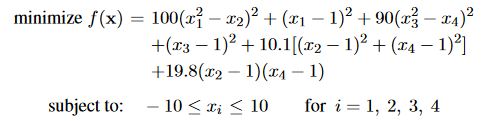

In [15]:
f_x, iqc = question45()
initial_x = np.array([-2,2, -2,2], dtype=np.float64)

In [16]:
solution = run_exercise(f_x, None, iqc,
             [(SteepestDescentAlgorithm, BacktrackingLineSearch), 
              ConjugateGradientAlgorithm, 
              QuasiNewtonAlgorithm, 
              (BasicNewtonAlgorithm, BacktrackingLineSearch)],
                        initial_x,
                        maxIter = 500,
                       plot_charts=False)

SteepestDescentAlgorithm didn't converge. AssertionError('X out of domain',)
minimize didn't converge. AttributeError('nhev',)


In [17]:
solution[['best_f', 'best_x', 'fevals', 'grad_evals', 'nevals', 'run_time (s)']]

,best_f,best_x,fevals,grad_evals,nevals,run_time (s)
SteepestDescentAlgorithm + BacktrackingLineSearch,817.992,"[-2.0, 2.0, -2.0, 2.0]",56,7,63,0.054240
ConjugateGradientAlgorithm,-2.17159e-05,"[1.0001643, 1.0003325, -0.99981, 0.9996141]",734,735,1469,17.154440
QuasiNewtonAlgorithm,-0.000264794,"[0.9975864, 0.9948901, -1.003793, 1.0067789]",77,4056,4133,15.782485
BasicNewtonAlgorithm + BacktrackingLineSearch,2.17192,"[0.0385403, 0.0066226, -1.3702917, 1.8871134]",32620,1523,34143,49.412701
minimize,-8.78959,"[0.9968323, 0.9939374, -0.9988199, 0.9979239]",984,0,984,0.332656


Na questão 5, nenhum algoritmo aproximou-se do resultado encontrado pelo minimize do SciPy. Porém se prestarmos a atenção na coluna best_x, os algoritmos ConjugateGradientAlgorithm, QuasiNewton e minimize do Scipy se aproximam do vetor $\mathbf{x} = [1,1,-1,1]$. O SteepestDescentAlgorithm com BLS não convergiu.

## Questão 6

Refaça os exemplos 16.1 e 16.2 do livro do Antoniou.

### Example 16.1
Applying the above method, design a linear-phase lowpass FIR digital filter that would satisfy the following specifications:  

- passband edge $=0.45\pi$,
- stopband edge $=0.5\pi$, 
- maximum passband error $\delta_p = 0.025$,
- minimum stopband attenuation $=40$ dB. 

Assume idealized passband and stopband gains of 1 and 0, respectively, and a normalized sampling frequency of $2\pi$.

In [18]:
from functions.design_filter import FilterDesign
order_length=200
filter1 = FilterDesign(gamma=3e3, 
                         nb_sampled_frequencies_pass=300, 
                         nb_sampled_frequencies_stop=300, 
                         order_length=order_length, 
                         passband_edge=0.45*np.pi,
                         stopband_edge=0.5*np.pi,
                         passband_error=0.025,
                         stopband_attenuation=40,
                         passband_gain=1)

No arquivo [../../functions/design_filter.py](../../functions/design_filter.py) foi implementado o projeto de filtro digital proposto por Antoniou nos capítulos 9 e 16.

In [19]:
fx, iqc = filter1.f_x, filter1.iqc

In [20]:
find_feasible_f = functionObj(lambda x: 1, iqc=[iqc])
x0 = np.zeros(filter1.Q.shape[0])
initial_x = UnconstrainProblem(find_feasible_f, x0, BasicNewtonAlgorithm, 
                   line_search_optimizer=BacktrackingLineSearch).find_min()
print(initial_x, find_feasible_f.func(initial_x))

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0.] inf


O algoritmo de encontrar um ponto inicial viável não funcionou.

In [21]:
solution = run_exercise(filter1.f_x, None, [iqc],
             [(SteepestDescentAlgorithm, BacktrackingLineSearch), 
              ConjugateGradientAlgorithm, 
              QuasiNewtonAlgorithm, 
              (BasicNewtonAlgorithm, BacktrackingLineSearch)],
                        initial_x,
                       plot_charts=False)

SteepestDescentAlgorithm didn't converge. AssertionError('X out of domain',)
QuasiNewtonAlgorithm didn't converge. AssertionError('X out of domain',)
minimize didn't converge. AttributeError('nhev',)


O SteepestDescentAlgorithm com BLS não convergiu, provavelmente devido ao $x_0$ inviável.
O QuasiNewtonAlgorithm também não convergiu, capaz que também por causa do $x_0$ inviável.

In [22]:
solution[['best_f', 'best_x', 'fevals', 'grad_evals', 'nevals', 'run_time (s)']]

,best_f,best_x,fevals,grad_evals,nevals,run_time (s)
SteepestDescentAlgorithm + BacktrackingLineSearch,inf,"[inf, -inf, 7.81190315455657e+299, inf, -7.812...",2298,150,2448,5.919595
ConjugateGradientAlgorithm,-1.41309,"[0.4630836, 0.6323091, 0.0731498, -0.199393, -...",59,59,118,2.934504
QuasiNewtonAlgorithm,inf,"[2.8274334, 1.9753767, 0.309017, -0.5940043, -...",3,5,8,0.022805
BasicNewtonAlgorithm + BacktrackingLineSearch,-1.41309,"[0.4709347, 0.6337313, 0.057723, -0.2036092, -...",68,16,84,7.219854
minimize,inf,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",515,0,515,1.578458


Apenas os algoritmos ConjugateGradientAlgorithm e BasicNewtonAlgorithm com BLS convergiram para um $x$ final.
É interessante notar que nem o minimize do SciPy conseguiu atingir uma convergência.

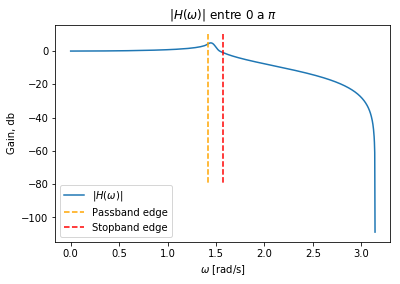

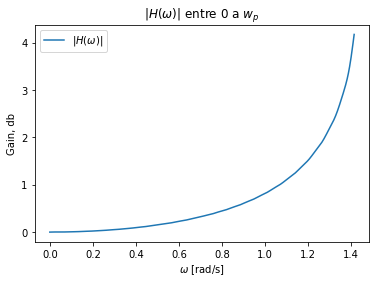

In [23]:
result = solution.loc['ConjugateGradientAlgorithm', 'best_x']
freq_response = lambda w: filter1.freq_response(w, result)
w = np.linspace(0, np.pi, 1000)
mod = [freq_response(w0) for w0 in w]
plt.plot(w, 20*np.log10(np.absolute(mod)), label='$|H(\omega)|$')
plt.plot([0.45*np.pi, 0.45*np.pi], [10, -80], color='orange', linestyle='--', label='Passband edge')
plt.plot([0.5*np.pi, 0.5*np.pi], [10, -80], color='red', linestyle='--', label='Stopband edge')
plt.ylabel('Gain, db')
plt.xlabel('$\omega$ [rad/s]')
plt.title('$|H(\omega)|$ entre 0 a $\pi$')
plt.legend()
plt.show()
w = np.linspace(0, 0.45*np.pi, 1000)
mod = [freq_response(w0) for w0 in w]
plt.plot(w, 20*np.log10(np.absolute(mod)), label='$|H(\omega)|$')
plt.ylabel('Gain, db')
plt.xlabel('$\omega$ [rad/s]')
plt.title('$|H(\omega)|$ entre 0 a $w_p$')
plt.legend()
plt.show()

Nos gráficos acima, utilizou-se o x encontrado pelo ConjugateGradientAlgorithm. É visível que o filtro entregue não atinge a atenuação de 40dB no stopband.

### Example 16.2
Assuming idealized passband and stopband gains of 1 and 0, respectively, and a normalized sampling frequency of $2\pi$, apply the SDP-based minimax approach described in Sec. 16.2.2 to design a lowpass FIR filter of order 84 with a passband edge $\omega_p = 0.45\pi$ and a stopband edge $\omega_a=0.5\pi$.